# TUTORIAL for LOGISTIC REGRESSOR

In this notebook we will run all the scripts in order to show how a text analysis can be done with a logistic regressor.
For the installation of the library pleaase follow the [Installing the library](https://github.com/flaviobaccarini/text_analysis/blob/main/README.md#installing-the-library) section on the [README.md](https://github.com/flaviobaccarini/text_analysis/blob/main/README.md) file.
After the installation of the library we can change the directory in order to go in the scripts folder.

In [1]:
%cd ../scripts

/home/flavio/Documenti/SOFTWARE_COMPUTING/text_analysis/scripts


In [ ]:
import matplotlib
%matplotlib inline

Now we can run the first script to have a pre-analysis for the data.
We will show some plots regarding the label distributions, word/characters average length for different labels. 
It will be printed also some information about the three dataframes: train, validation and test dataframe.

[nltk_data] Downloading package omw-1.4 to /home/flavio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/flavio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/flavio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/flavio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/flavio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


First five rows of train dataset
                                                   text  label
2716  House-Maid is the murderer, coz the man was mu...      0
427               Any pain on urination any thing else?      0
1670                                        Lmao!nice 1      0
3439                     What time you thinkin of goin?      0
4596             Full heat pa:-) i have applyed oil pa.      0

Description of train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 2716 to 4141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3900 non-null   object
 1   label   3900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 91.4+ KB

Description of validation dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 3 to 5564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    836 non-null    object
 1   la

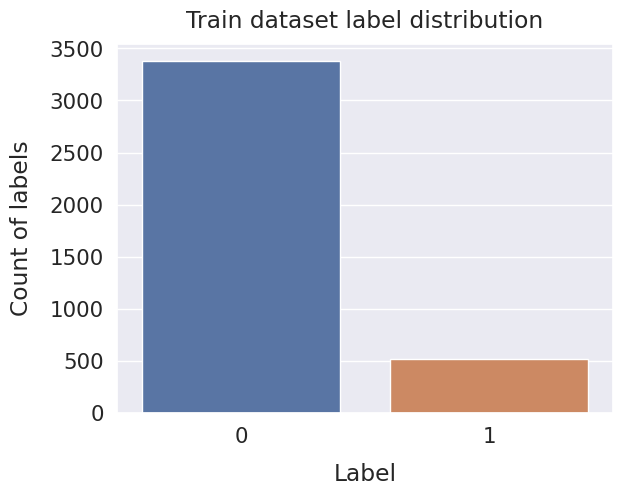

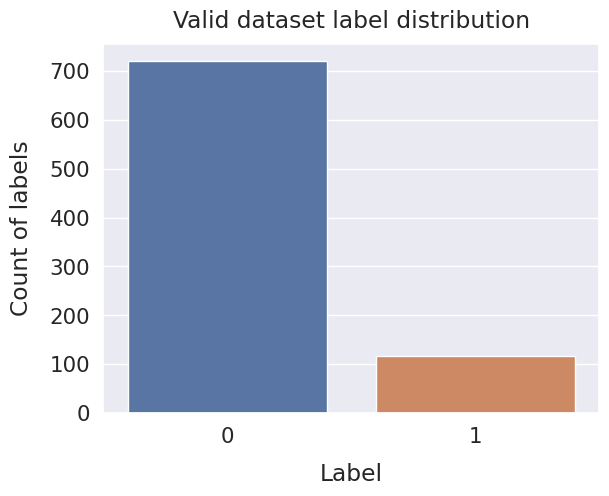

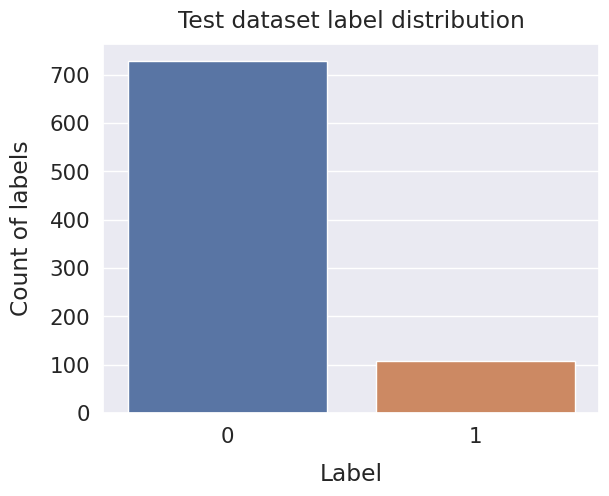

0 labels length (average words):training 14.2 validation 14.0 test 14.5
1 labels length (average words):training 23.9 validation 23.4 test 24.1
0 labels length (average chars):training 70.7 validation 70.6 test 72.7
1 labels length (average chars):training 138.8 validation 137.6 test 140.7


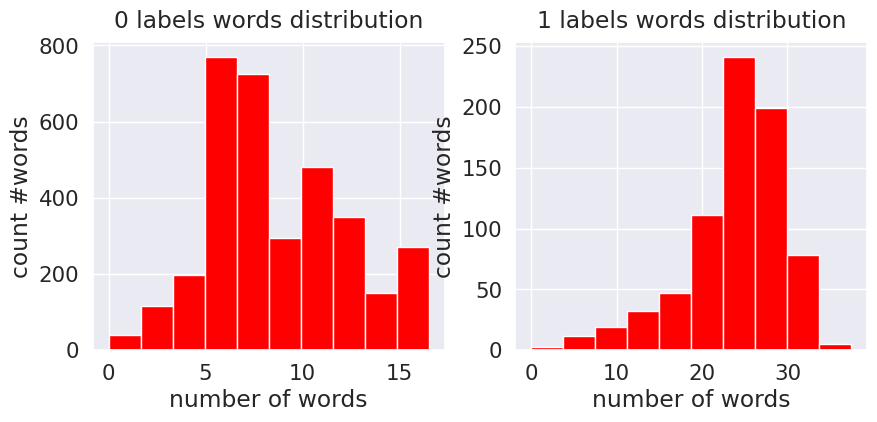

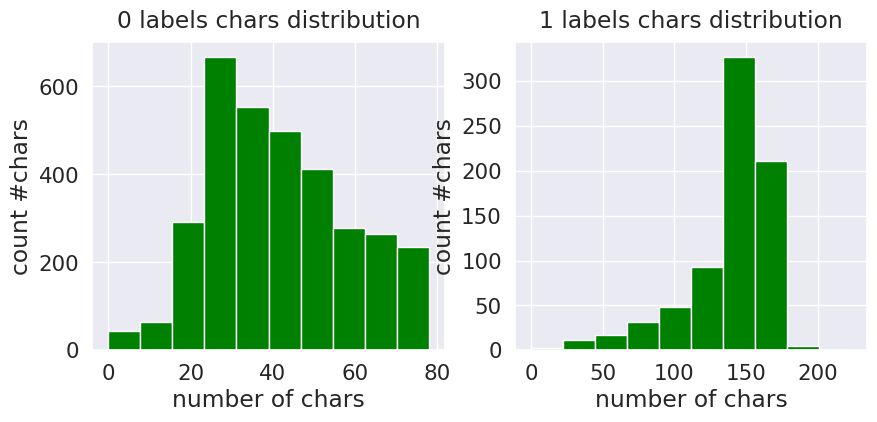

In [2]:
%run 'explore.py' 'config.ini'

Now we can preprocess the data. We will execute the preprocess script. We clean the text from everything but alphanumeric characters and we will store the preprocessed dataframes in a new folder called "preprocessed_dataset". We will print some "cleaned" text and we will compare this "cleaned" text with the original one.

In [3]:
%run 'preprocess.py' 'config.ini'

100%|████████████████████████████████████████| 836/836 [00:04<00:00, 175.07it/s]

2716    house maid murderer coz man murder lt gt th ja...
427                             pain urination thing else
1670                                          lmao nice 1
3439                                    time thinkin goin
4596                            full heat pa apply oil pa
Name: clean_text, dtype: object
3                   u dun say early hor u c already say
4                   nah think go usf life around though
5     freemsg hey darling 3 week word back like fun ...
10    gon na home soon want talk stuff anymore tonig...
20                                 seriously spell name
Name: clean_text, dtype: object
Some random texts:

Original text:
Hmmm.... Mayb can try e shoppin area one, but forgot e name of hotel...

Cleaned text:
hmmm mayb try e shoppin area one forgot e name hotel

Original text:
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

Cleaned text:
mobil

Now we can vectorize the data and train the logistic regressor.
For the data vectorization we will use the gensim Word2Vec model.
At the end we will save both the models (Word2Vec and logistic regressor) in a folder called "checkpoint".

In [4]:
%run 'train_lr.py' 'config.ini'

2022-12-20 17:20:44.430542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 17:20:47.716495: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/flavio/root/lib
2022-12-20 17:20:47.716830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/flavio/root/lib
2022-12-20 17:20:47.716862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Train logistic regressor...
Logistic Regression: training done


We have just trained and saved both the models (Word2Vec and logistic regressor).
With evaluate_lr script we load the models that we have saved and then we evaluate the accuracy of the logistic regressor model.

The three most common words:
u
get
call
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       727
           1       0.71      0.16      0.26       108

    accuracy                           0.88       835
   macro avg       0.80      0.57      0.60       835
weighted avg       0.86      0.88      0.85       835

Confusion Matrix: [[720   7]
 [ 91  17]]
AUC: 0.9445463345050691


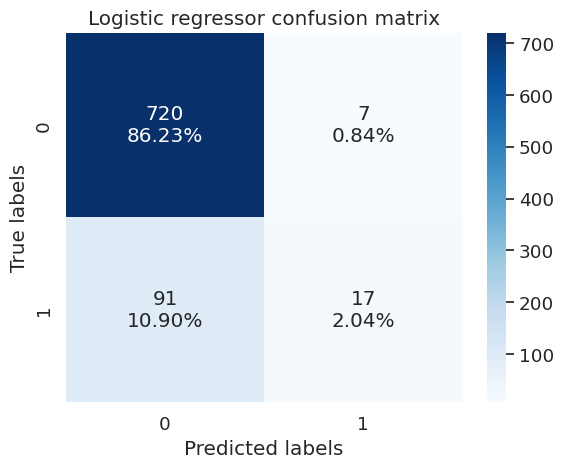

Logistic regressor model, accuracy: 88.26%


In [5]:
%run 'evaluate_lr.py' 'config.ini'